In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 

In [2]:
white_wines = pd.read_csv('/home/belczack/python/winequality-white.csv', sep = ';')
red_wines = pd.read_csv('/home/belczack/python/winequality-red.csv', sep =';')

In [4]:
wines = pd.concat([white_wines, red_wines], axis = 0)

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
print('Zbior zawiera {} obserwacji i {} zmiennych'.format(wines.shape[0], wines.shape[1]))

Zbior zawiera 6497 obserwacji i 12 zmiennych


In [11]:
print('Lista zmiennych dostepnych w zbiorze: {}'. format(list(wines.columns)))

Lista zmiennych dostepnych w zbiorze: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [12]:
wines.agg(['mean', 'median'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
median,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000


In [13]:
wines.skew()

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [15]:
wines.kurtosis().abs().sort_values

<bound method Series.sort_values of fixed acidity            5.061161
volatile acidity         2.825372
citric acid              2.397239
residual sugar           4.359272
chlorides               50.898051
free sulfur dioxide      7.906238
total sulfur dioxide     0.371664
density                  6.606067
pH                       0.367657
sulphates                8.653699
alcohol                  0.531687
quality                  0.232322
dtype: float64>

In [19]:
wines.agg(['kurtosis','skew']).T

,kurtosis,skew
fixed acidity,5.061161,1.723290
volatile acidity,2.825372,1.495097
citric acid,2.397239,0.471731
residual sugar,4.359272,1.435404
chlorides,50.898051,5.399828
free sulfur dioxide,7.906238,1.220066
total sulfur dioxide,-0.371664,-0.001177
density,6.606067,0.503602
pH,0.367657,0.386839
sulphates,8.653699,1.797270


In [22]:
print('Liczba zmiennych w zbiorze:', wines.shape[1])

Liczba zmiennych w zbiorze: 12


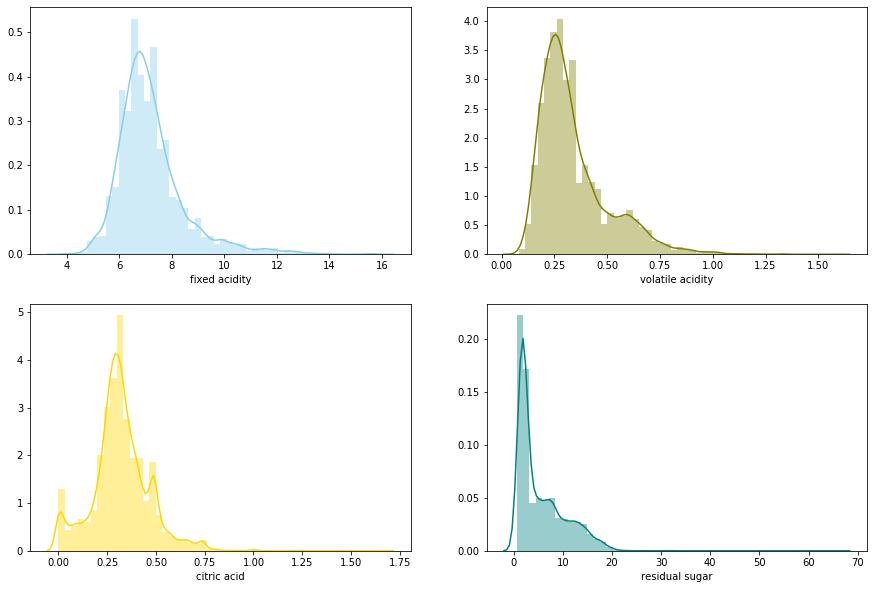

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(wines['fixed acidity'], color='skyblue', ax = axes[0,0])
sns.distplot(wines['volatile acidity'], color='olive', ax=axes[0,1])
sns.distplot(wines['citric acid'], color='gold', ax=axes[1,0])
sns.distplot(wines['residual sugar'], color='teal', ax = axes[1,1])
plt.show()

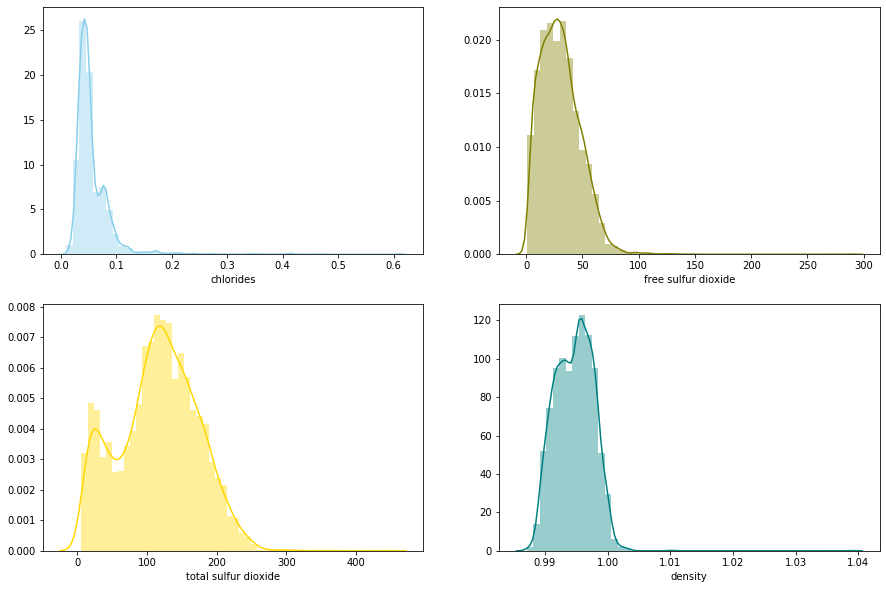

In [27]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(wines['chlorides'], color='skyblue', ax = axes[0,0])
sns.distplot(wines['free sulfur dioxide'], color='olive', ax=axes[0,1])
sns.distplot(wines['total sulfur dioxide'], color='gold', ax=axes[1,0])
sns.distplot(wines['density'], color='teal', ax = axes[1,1])
plt.show()

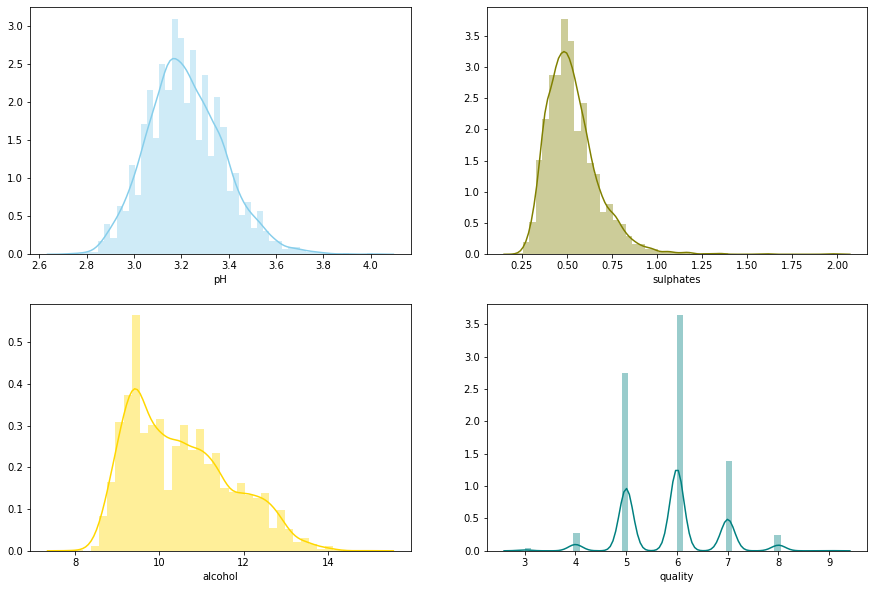

In [28]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(wines['pH'], color='skyblue', ax = axes[0,0])
sns.distplot(wines['sulphates'], color='olive', ax=axes[0,1])
sns.distplot(wines['alcohol'], color='gold', ax=axes[1,0])
sns.distplot(wines['quality'], color='teal', ax = axes[1,1])
plt.show()

In [29]:
help(scipy.stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws an error
          * 'omit': performs the calculations ignoring nan values
    
    Returns
  

In [34]:
results = []
for feature in wines.columns:
    alpha = 0.05
    p_value = scipy.stats.normaltest(wines[feature])[1]
    results.append([feature, p_value])
    if(p_value < alpha):
        print('Dla zmiennej \'' + feature +'\' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value:', p_value)
    else:
        print('Dla zmiennej \'' + feature +'\' nie wykryto podstaw do odrzucenia hipitezy zerowej. Zmienna POCHODZI z rozkładu normalnego. P-value:', p_value)


Dla zmiennej 'fixed acidity' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej 'volatile acidity' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej 'citric acid' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 2.6841653491247353e-128
Dla zmiennej 'residual sugar' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej 'chlorides' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej 'free sulfur dioxide' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej 'total sulfur dioxide' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 4.2111031353418164e-13
Dla zmiennej 'density' odrzucam hipotezę zerową. Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 3.398816644391042e-245
Dla zmiennej 'pH' odrzucam hipotezę zerow

In [35]:
summary = pd.DataFrame(results)
summary.columns=['nazwa zmiennej', 'p_value']
summary.set_index('nazwa zmiennej', inplace=True)
summary.sort_values('p_value', ascending=False, inplace=True)

In [36]:
summary

,p_value
nazwa zmiennej,
quality,1.160615e-11
total sulfur dioxide,4.211103e-13
pH,1.947509e-39
alcohol,1.959960e-98
citric acid,2.684165e-128
density,3.398817e-245
fixed acidity,0.000000e+00
volatile acidity,0.000000e+00
residual sugar,0.000000e+00
